# Splitting the data

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [ ]:
original_dataset_dir = 'C:/NCI/Research Project/Waste_data'
train_dir = 'C:/NCI/Research Project/train'
test_dir = 'C:/NCI/Research Project/test'

In [ ]:
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [ ]:
categories = os.listdir(original_dataset_dir)


In [ ]:
test_size = 0.2

In [ ]:
for category in categories:
    # Create class-specific directories in train/test folders
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)
    
    # Get all image filenames for this category
    category_path = os.path.join(original_dataset_dir, category)
    images = os.listdir(category_path)
    
    # Split into train/test sets
    train_images, test_images = train_test_split(images, test_size=test_size)
    
    # Copy the images to the respective directories
    for image in train_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(train_dir, category, image))
    for image in test_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(test_dir, category, image))

In [ ]:
import os
import shutil
import random

# Correct the base directory path
base_dir = "C:/Users/arshi/Desktop/Research Project/data_waste" 
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Create the test directory if it doesn't exist
os.makedirs(test_dir, exist_ok=True)

# Number of images to move per class
NUM_IMAGES = 5

# Check if the train directory exists
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Train directory does not exist: {train_dir}")

# Move images to the test folder
for class_name in os.listdir(train_dir):
    class_train_dir = os.path.join(train_dir, class_name)

    if not os.path.isdir(class_train_dir):
        continue  # Skip if it's not a directory

    files = os.listdir(class_train_dir)
    selected_files = random.sample(files, min(NUM_IMAGES, len(files)))

    for file in selected_files:
        src_path = os.path.join(class_train_dir, file)
        dst_path = os.path.join(test_dir, f"{class_name}_{file}")  
        shutil.move(src_path, dst_path)

print("Test dataset created")

# loading data and preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
import seaborn as sns
import os
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Rescaling, Resizing

# train data 

In [ ]:
train_set = tf.keras.utils.image_dataset_from_directory(
    'data_waste/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(264, 264),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

# Test data

In [ ]:
valid_set = tf.keras.utils.image_dataset_from_directory(
    'data_waste/valid',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(264, 264),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)


In [ ]:
batch_sie = 32
dataset_name = valid_set
class_name = valid_set.class_names
print(class_name)

In [ ]:
batch_sie = 32
dataset_name = train_set
class_name = train_set.class_names
print(class_name)

# visualization

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
for images, labels in train_set.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_name[labels[i]])
        plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
#batch of 32 images with dimension of 256*256*3 which is color channel rgb

In [ ]:
for x,y in train_set:
    print(x,x.shape)
    print(y,y.shape)
    break

In [ ]:
normalization_layer = Rescaling(1./255)

In [ ]:
size = (264, 264)
ds_train_set = train_set.map(lambda image, label: (tf.image.resize(image, size),label))
ds_valid_set = valid_set.map(lambda image, label: (tf.image.resize(image, size),label))

In [ ]:
train_set = train_set.map(lambda x, y: (normalization_layer(x), y))
valid_set = valid_set.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
for x,y in train_set:
    print(x,x.shape)
    print(y,y.shape)
    break

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os

# Initialize ImageDataGenerator with your augmentation settings
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Directory paths
input_dir = 'data_waste/train'  
output_dir = 'Augmented_data'  # Output directory to save augmented images

# Loop through each subfolder in the input directory
for folder_name in os.listdir(input_dir):
    folder_path = os.path.join(input_dir, folder_name)
    
    if os.path.isdir(folder_path):
        # Create the same subfolder in the output directory if it doesn't exist
        save_folder = os.path.join(output_dir, folder_name)
        os.makedirs(save_folder, exist_ok=True)
        
        # Loop through each image in the subfolder
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            
            if file_name.lower().endswith(('jpg', 'jpeg', 'png')):  # Check for valid image files
                img = load_img(file_path)
                x = img_to_array(img)
                x = x.reshape((1,) + x.shape)
                
                # Generate augmented images and save them
                i = 0
                for batch in datagen.flow(x, batch_size=1,
                                          save_to_dir=save_folder,
                                          save_prefix=f"{folder_name}_aug",
                                          save_format='jpeg'):
                    i += 1
                    if i > 3:  # Change this number to generate more or fewer augmentations per image
                        break

print("Augmentation complete.")


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

Found 19986 images belonging to 26 classes.
Found 7512 images belonging to 26 classes.
Epoch 1/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 1312s 1s/step - accuracy: 0.1205 - loss: 4.2062 - val_accuracy: 0.1530 - val_loss: 3.6939
Epoch 2/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1875 - loss: 3.1385 - val_accuracy: 0.2500 - val_loss: 3.3339
Epoch 3/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 1238s 991ms/step - accuracy: 0.1527 - loss: 3.4555 - val_accuracy: 0.1541 - val_loss: 3.5032
Epoch 4/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.1875 - loss: 3.0532 - val_accuracy: 0.2500 - val_loss: 2.9159
Epoch 5/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 1305s 1s/step - accuracy: 0.1667 - loss: 3.2844 - val_accuracy: 0.1611 - val_loss: 3.3690
Epoch 6/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 1s 493us/step - accuracy: 0.0000e+00 - loss: 3.7703 - val_accuracy: 0.2500 - val_loss: 2.3780
Epoch 7/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 1328s 1s/step - accuracy: 0.1799 - loss: 3.1846 - val_accuracy: 0.1780 - v

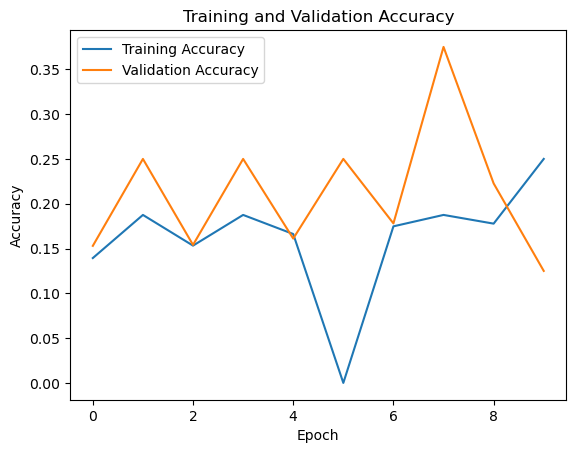

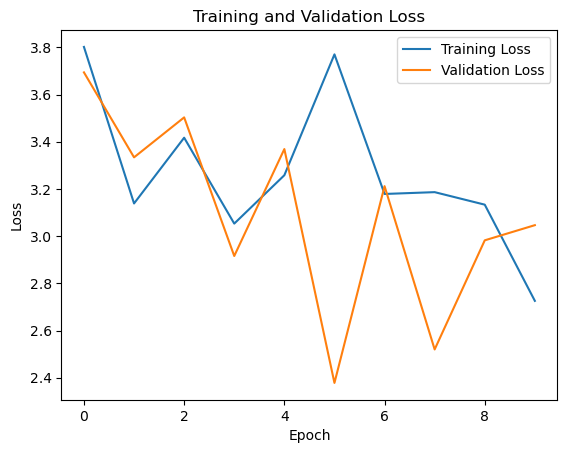

In [21]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import regularizers

# Define directory paths for training and validation data
train_dir = "Augmented_data(1)/train"
val_dir = "Augmented_data(1)/valid"

# Data preprocessing and augmentation for training and validation datasets
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,  # Add vertical flip 
    fill_mode="nearest",
)
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode="categorical",
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode="categorical",
)

# Number of classes for the output layer
num_classes = len(train_generator.class_indices)

# Load the pre-trained InceptionV3 model
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Freeze the base model to retain pre-trained features
base_model.trainable = False

# Add custom classification layers
# Add custom classification layers with Batch Normalization
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(1024, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
])

# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size

# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=val_generator,
    validation_steps=validation_steps,
)

# Save the model for future use
model.save("ResNet50_with_BatchNormalization.h5")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

470/470 ━━━━━━━━━━━━━━━━━━━━ 343s 725ms/step
Classification Report:
                        precision    recall  f1-score   support

       Crushed bottles       0.00      0.00      0.00        72
    Dirty paper plates       0.00      0.00      0.00        25
Entangled plastic bags       0.00      0.00      0.00        53
   Greased pizza boxes       0.00      0.00      0.00        58
         Medical waste       0.09      0.15      0.12       681
            Paint cans       0.00      0.00      0.00        55
            Paper Bowl       0.04      0.04      0.04       107
           Plastic Cup       0.00      0.00      0.00        72
             Sauce Cup       0.00      0.00      0.00        62
               bandaid       0.04      0.06      0.05       290
               battery       0.06      0.07      0.06       450
                  bulb       0.06      0.07      0.06       450
                  cans       0.05      0.05      0.05       456
             cardboard       0.13  

C:\Users\arshi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\arshi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\arshi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


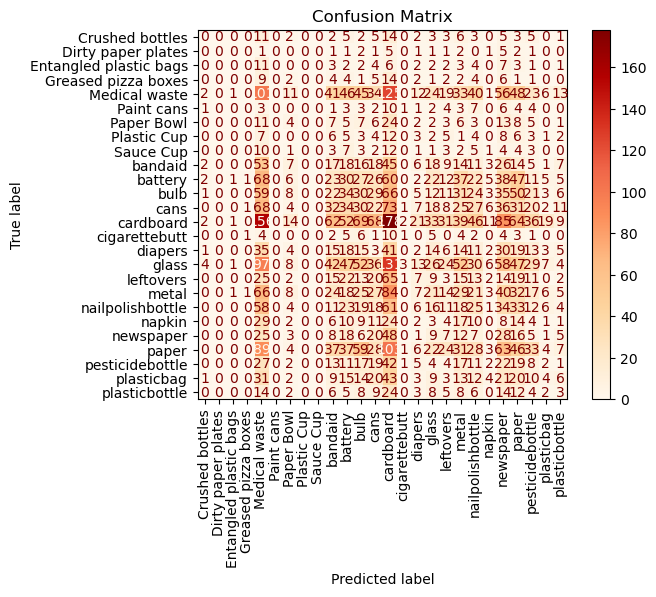

In [23]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get the ground truth labels and predictions for the validation data
val_generator.reset()  # Ensure generator starts from the first batch
y_true = val_generator.classes  # True labels

# Predict the classes for validation data
y_pred = model.predict(val_generator, steps=val_generator.samples // val_generator.batch_size + 1)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class labels

# Get class labels
class_labels = list(val_generator.class_indices.keys())

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
disp.plot(cmap="OrRd", xticks_rotation="vertical")
plt.title("Confusion Matrix")
plt.show()
